# ML Algorithms

This Notebook uses the dataset 'diagnose2.csv' We will explore the application of two popular machine learning algorithms, Random Forest (RF) and K-Nearest Neighbors (KNN), to solve a classification problem. 

We start by importing necessary Python libraries for data manipulation, preprocessing, model training, and evaluation. We will be using Pandas for data manipulation, Scikit-learn for machine learning algorithms, and other libraries like seaborn for visualization.

In [140]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [141]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

Next, we load the dataset into the notebook and display the rows to understand its structure. The describe() function provides statistical summary of the dataset including count, mean, standard deviation, minimum, maximum, and quartile values for numerical features.

In [142]:
# Loading the dataset
dataset = pd.read_csv('diagnose2.csv')
# Specify the features X and the target y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values
print(dataset)
display(dataset.describe()) #statistics of numerical features

      ID  Gender Location           x1           x2           x3         x4  \
0      0    Male   Dublin   591.305146  -445.646021 -1792.511304 -43.554215   
1      1     NaN   London  1646.650850 -1231.555731  -544.183955  85.151732   
2      2  Female  Belfast    17.937351  -594.165140  -647.680440  22.903837   
3      3    Male  Belfast   985.648670  -903.923263  -775.103070  18.531142   
4      4    Male   London   983.829283 -1431.588452   409.232842  40.739642   
..   ...     ...      ...          ...          ...          ...        ...   
387  387    Male   Dublin   246.491406  -964.284256   195.200253   7.284156   
388  388  Female  Belfast  -334.186421  -499.685835   469.644098   0.241976   
389  389  Female   Dublin  -326.269765  -459.056428  -318.092651 -14.070612   
390  390  Female   Dublin  -153.692921   323.636896   107.897240 -21.345488   
391  391    Male  Belfast   871.409545  -149.549456 -1037.170913  39.216723   

             x5         x6           x7         x8 

,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,Diagnosis
count,392.000000,392.000000,391.000000,392.000000,392.000000,391.000000,392.000000,391.000000,392.000000,391.000000,392.000000,391.000000,392.000000,391.000000,392.000000
mean,195.500000,150.639335,-119.207335,-226.931403,8.740624,-30.617114,5.632518,-33.034180,0.985648,318.612845,6.581419,-66.567258,35.023544,427.607151,0.994898
std,113.304898,541.127659,831.058722,1011.499990,25.258413,253.889756,68.597234,773.984443,14.218005,877.385685,459.003375,1041.685930,648.449640,1423.408399,0.818566
min,0.000000,-1752.000753,-2004.988049,-3131.223063,-65.759403,-684.129336,-186.545981,-2261.472982,-34.718490,-2191.538860,-1272.063334,-2911.285396,-2019.047863,-3413.203205,0.000000
25%,97.750000,-187.153553,-709.174573,-906.715474,-8.170030,-193.288066,-46.225259,-475.987936,-8.674107,-236.505814,-304.794067,-890.633278,-377.404464,-457.432102,0.000000
50%,195.500000,121.699687,-178.087579,-309.242004,10.341885,-21.119164,12.171812,-37.142842,0.759139,298.345970,36.185664,-88.789079,16.247891,431.770186,1.000000
75%,293.250000,472.012525,483.854894,290.715678,26.322306,138.593566,53.769455,502.007793,10.561777,924.109571,311.012854,636.939333,452.084230,1418.902292,2.000000
max,391.000000,1788.885281,2205.480804,2801.793625,85.151732,687.540199,167.810458,2605.817570,46.108043,3429.620922,1361.415470,2901.347712,1602.334073,4939.415762,2.000000


In [143]:
# basic information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         392 non-null    int64  
 1   Gender     391 non-null    object 
 2   Location   391 non-null    object 
 3   x1         392 non-null    float64
 4   x2         391 non-null    float64
 5   x3         392 non-null    float64
 6   x4         392 non-null    float64
 7   x5         391 non-null    float64
 8   x6         392 non-null    float64
 9   x7         391 non-null    float64
 10  x8         392 non-null    float64
 11  x9         391 non-null    float64
 12  x10        392 non-null    float64
 13  x11        391 non-null    float64
 14  x12        392 non-null    float64
 15  x13        391 non-null    float64
 16  Diagnosis  392 non-null    int64  
dtypes: float64(13), int64(2), object(2)
memory usage: 52.2+ KB
None


In [144]:
# Identifying number of categorical and numerical features
categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()
numeric_features = dataset.select_dtypes(exclude=['object']).columns.tolist()

print("Number of Categorical Variables:", len(categorical_features))
print("Number of Numeric Variables:", len(numeric_features))

# Counting null values in each column
null_counts = dataset.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

Number of Categorical Variables: 2
Number of Numeric Variables: 15
Number of null values in each column:
ID           0
Gender       1
Location     1
x1           0
x2           1
x3           0
x4           0
x5           1
x6           0
x7           1
x8           0
x9           1
x10          0
x11          1
x12          0
x13          1
Diagnosis    0
dtype: int64


In this dataset, there are null values in both categorical and numerical variables. In this case we will be imputing the values using : mean for numerical features and mode for categorical features.

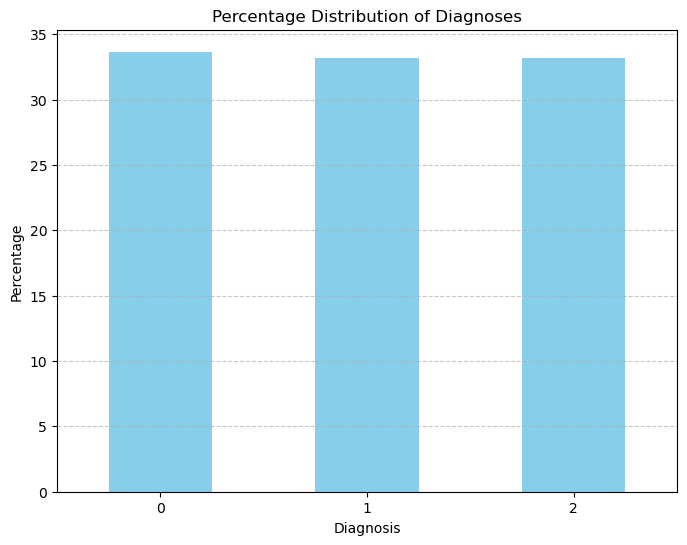

In [145]:
#Visualising the classes of the target variable

import pandas as pd
import matplotlib.pyplot as plt

# Group by Diagnosis and calculate the percentage of each diagnosis
diagnosis_percentage = dataset['Diagnosis'].value_counts(normalize=True) * 100

# Plotting the bar graph
plt.figure(figsize=(8, 6))
diagnosis_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Takeaway**

- Each diagnosis category is equally represented in the dataset, or in other words it is balanced. This means that there is no single category dominating the dataset, which can skew the learning process of machine learning models.

Advantage:
- When evaluating the performance of models trained on a balanced dataset, metrics like accuracy can be reliable indicators of model performance since there is no significant class imbalance to skew the results.
- When analyzing feature importance or conducting further analysis, it's less likely for a feature to be biased towards a particular diagnosis due to class imbalances.

**Exploring Categorical Features Distribution:**

I am using Matplotlib and Seaborn libraries to visualize the distribution of categorical features in the dataset. This helps to better understand the frequency of each category within the categorical variables.


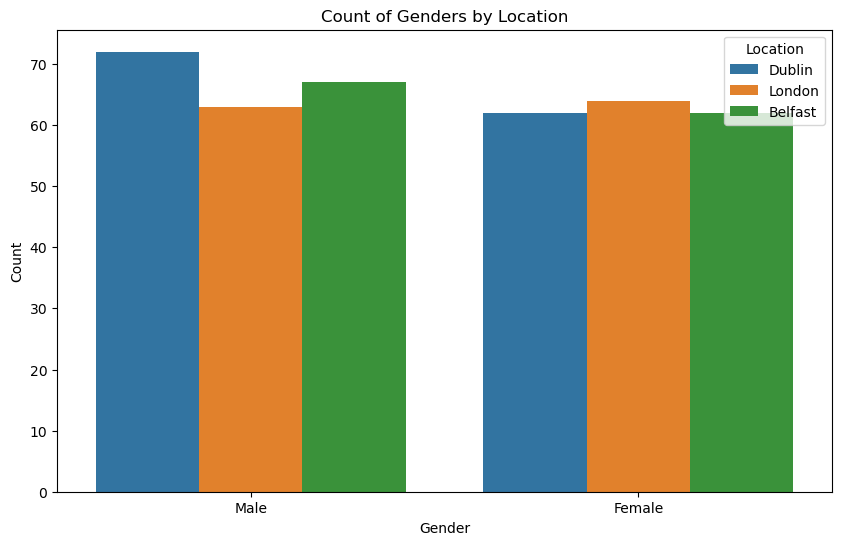

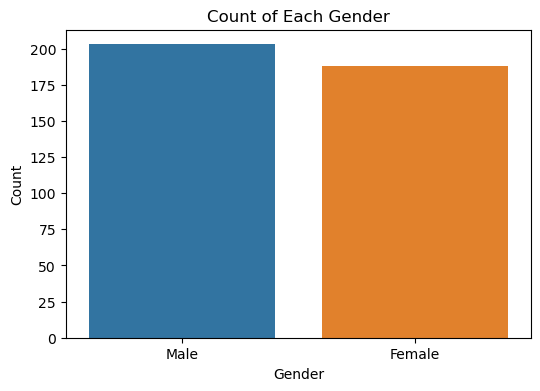

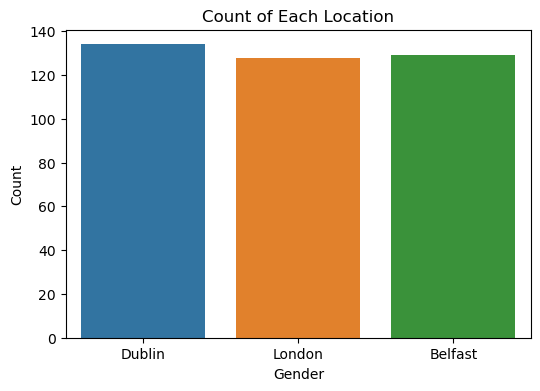

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Constructing the bar graph
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Location', data=dataset)
plt.title('Count of Genders by Location')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Location')
plt.show()

# Displaying count of each gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=dataset)
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Displaying count of Location
plt.figure(figsize=(6, 4))
sns.countplot(x='Location', data=dataset)
plt.title('Count of Each Location')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Take-away**
- **Male:** A count of over 70 males from Dublin suggests a significant proportion of males in the dataset are from Dublin.
- **Female:** A count of over 60 females from London suggests a significant proportion of females in the dataset are from London.
- Overall, The number of males is greater than the number of females in the dataset with most people coming from dublin. 

**Exploring Numerical Features Distribution:**

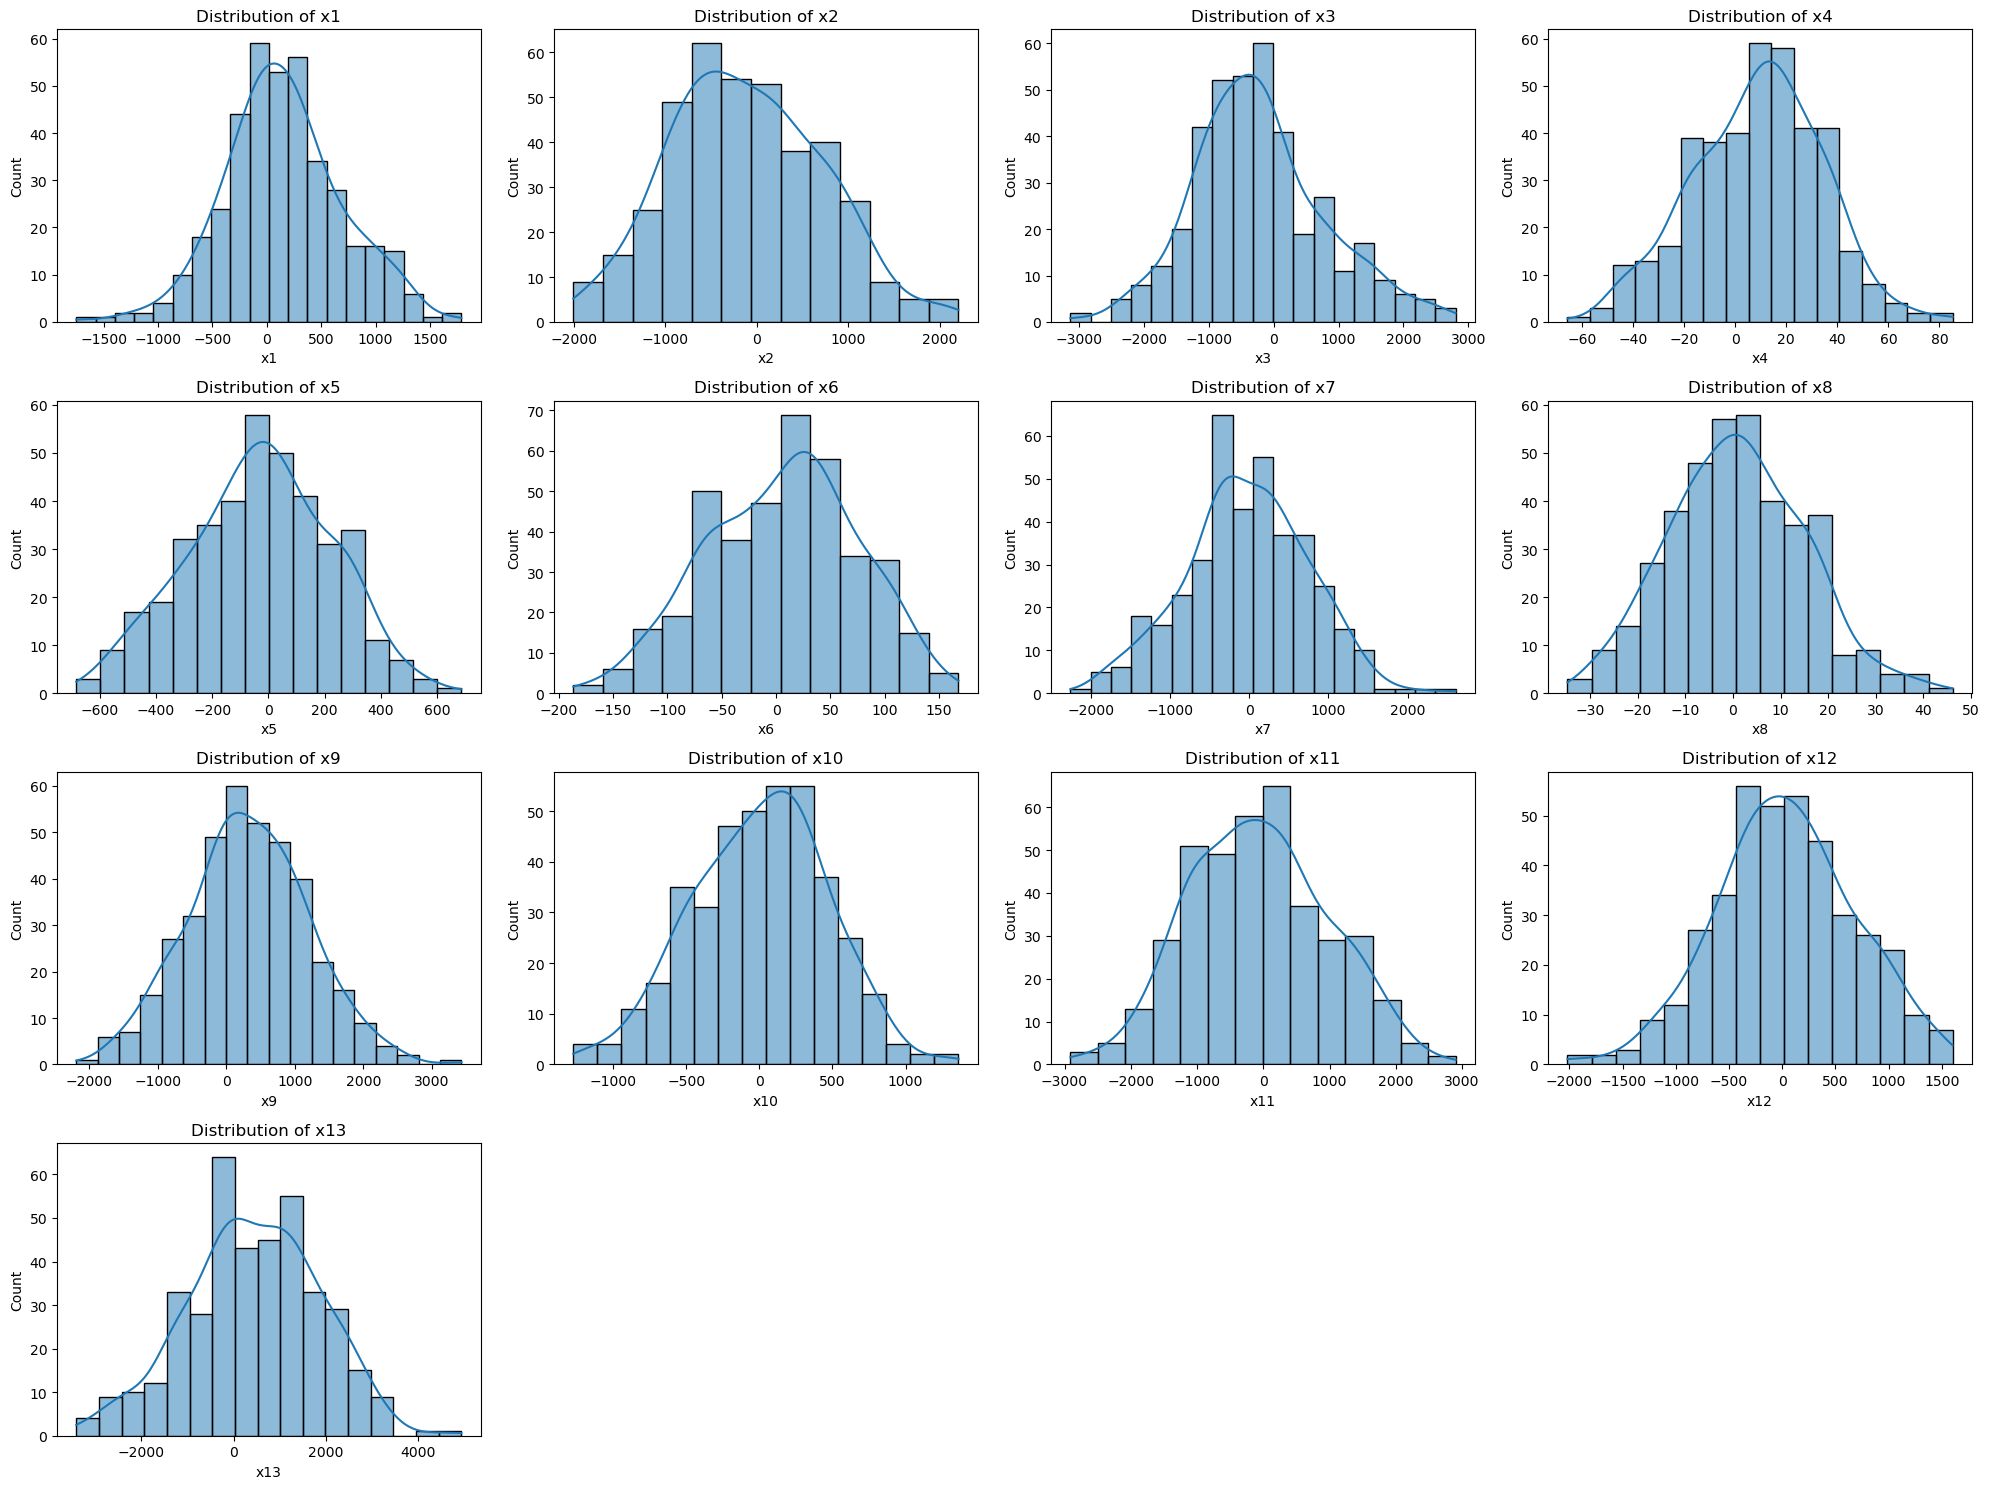

In [147]:
# Define numeric features based on the dataset
numeric_features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']

# Constructing the figure
plt.figure(figsize=(20, 15), facecolor='white')

# Plotting each numerical feature
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

**Exploring Relation Between Categorical Features and Target:**

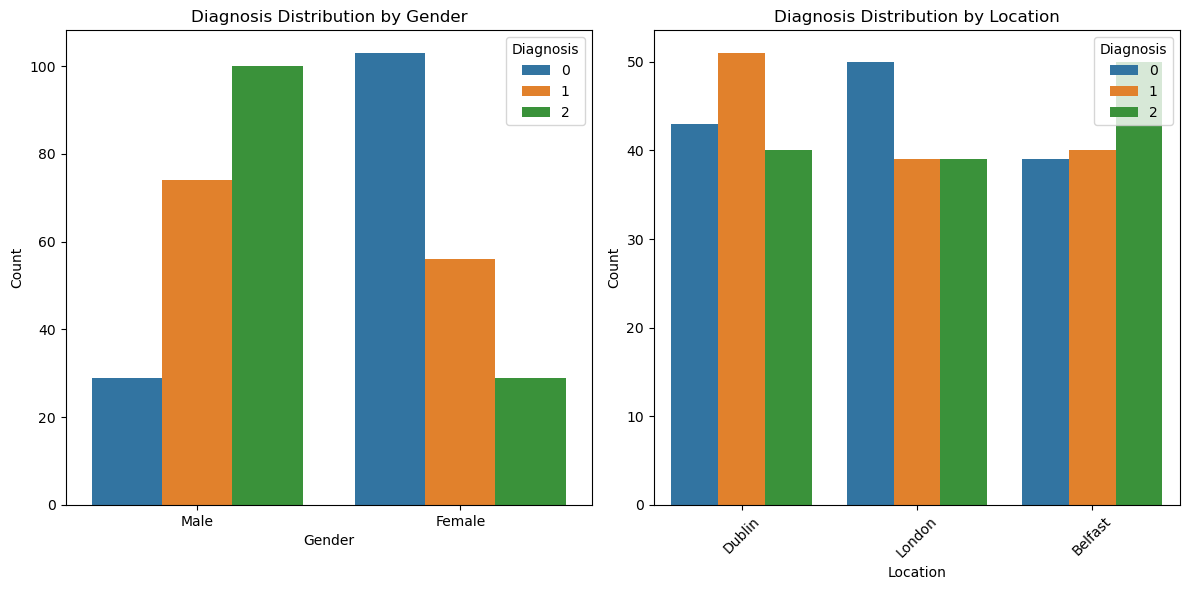

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

target_column = 'Diagnosis'

# Plot count plots for Gender and Location
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue=target_column, data=dataset)
plt.title('Diagnosis Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title=target_column)

plt.subplot(1, 2, 2)
sns.countplot(x='Location', hue=target_column, data=dataset)
plt.title('Diagnosis Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title=target_column)

plt.tight_layout()
plt.show()


**Exploring Relation Between Numerical Features and Target:**

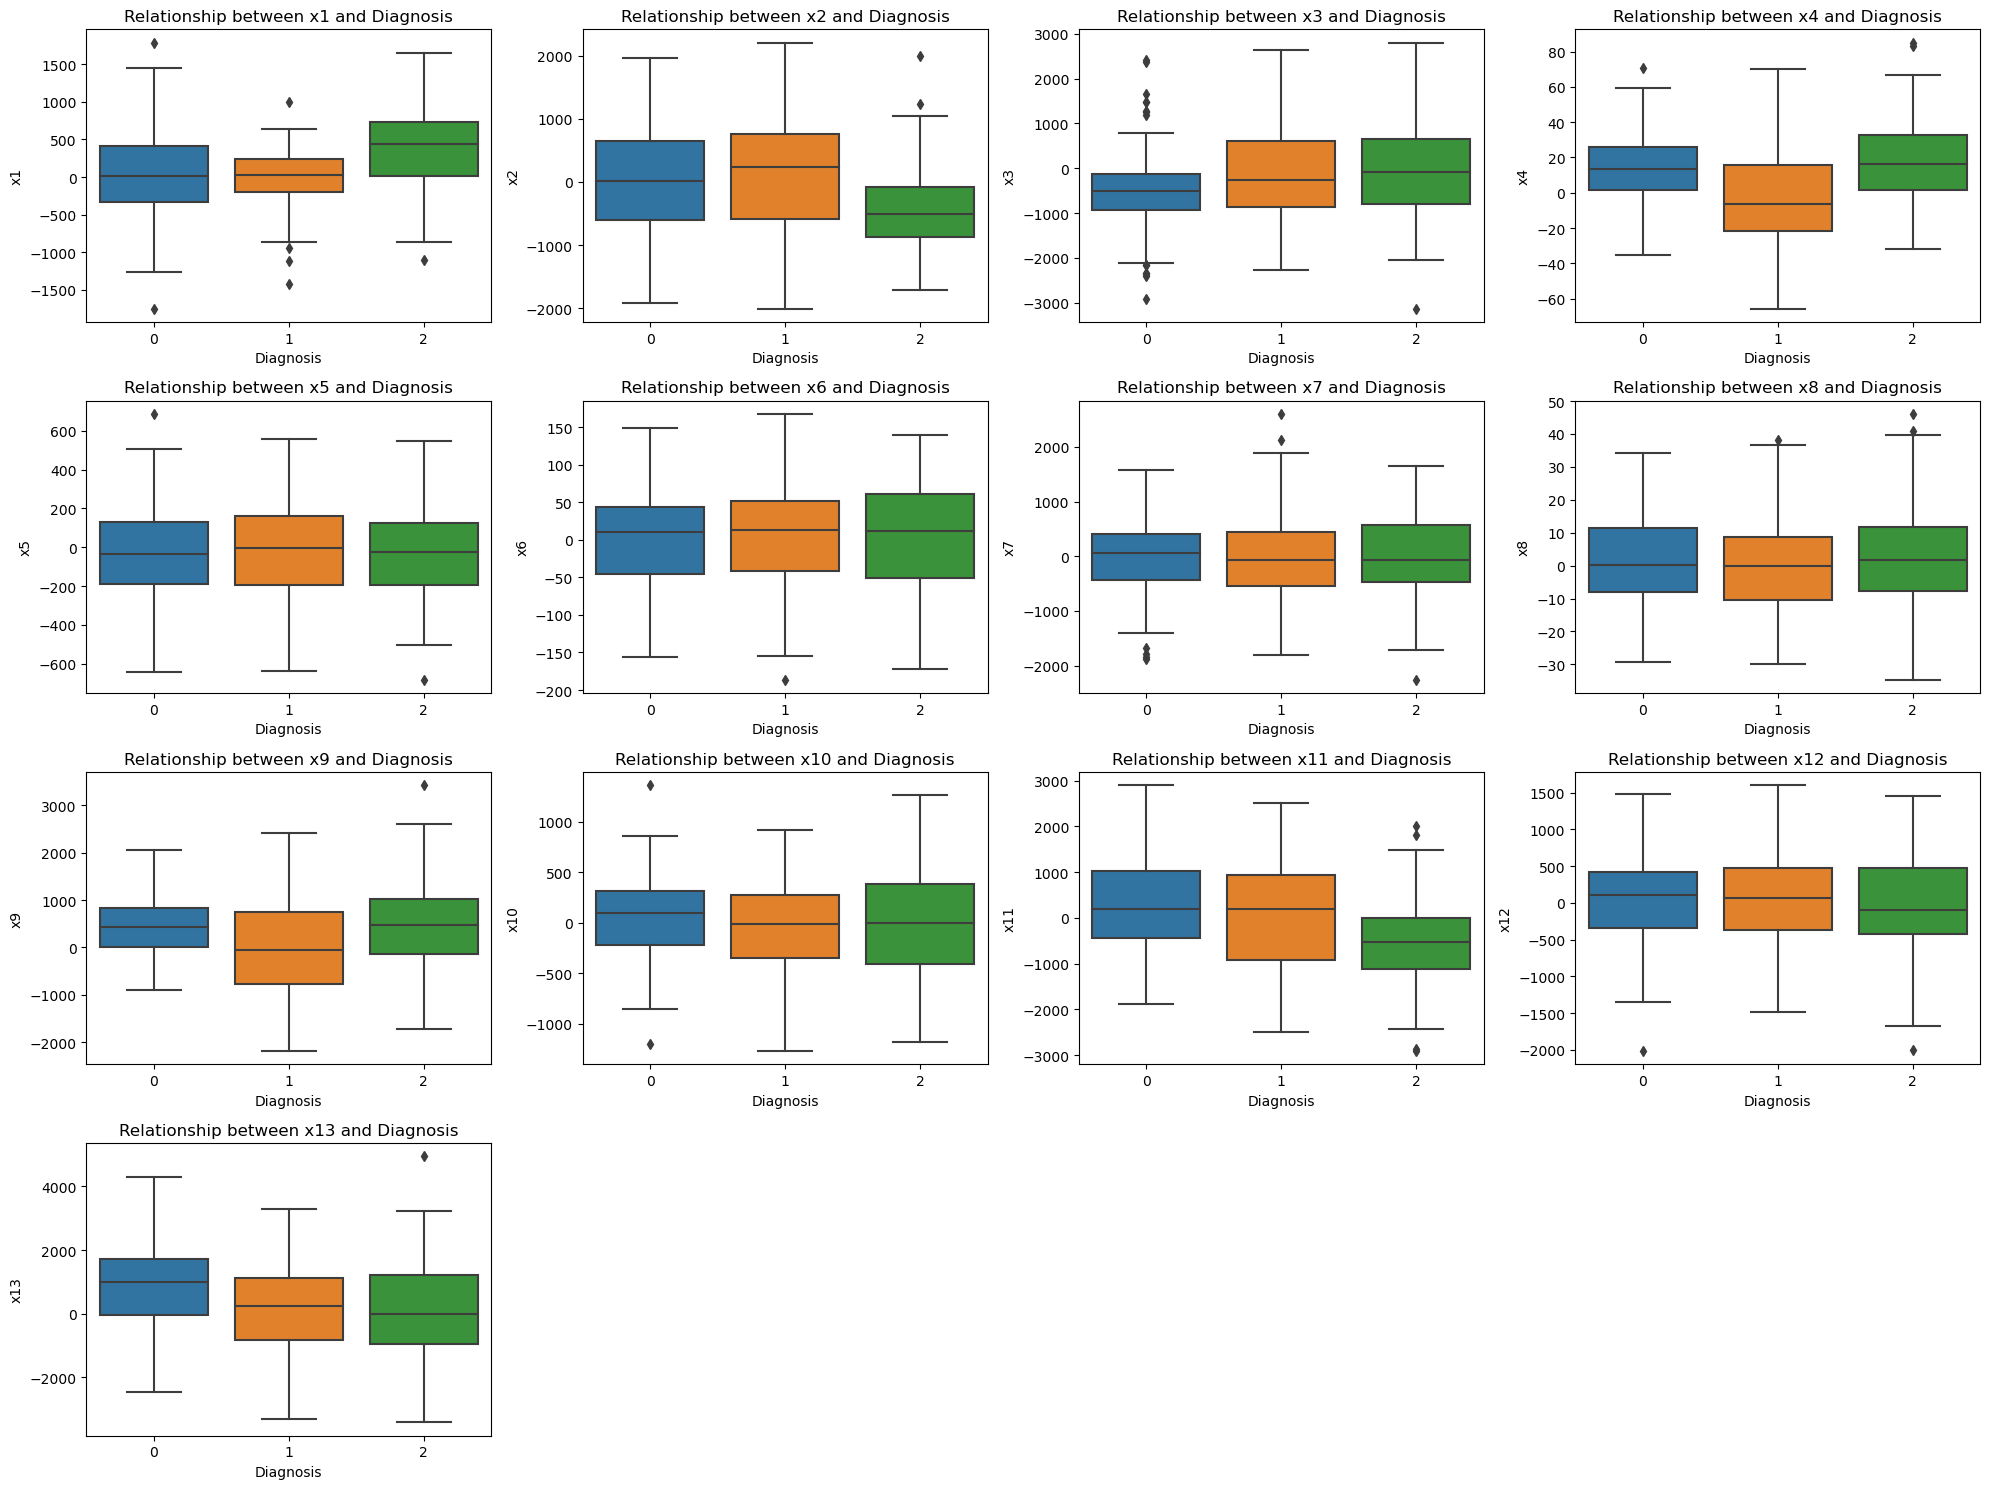

In [149]:
target_variable = 'Diagnosis'

# Plotting the relationship between numerical features and the target variable
plt.figure(figsize=(20, 15))

# Plotting the relationship between numerical features and the target variable
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)  # Change to 4x4 grid for 13 features
    sns.boxplot(data=processed_Data, x=target_variable, y=col)
    plt.title(f'Relationship between {col} and Diagnosis')
    plt.tight_layout()

plt.show()

**Correlation matrix of numeric variables**

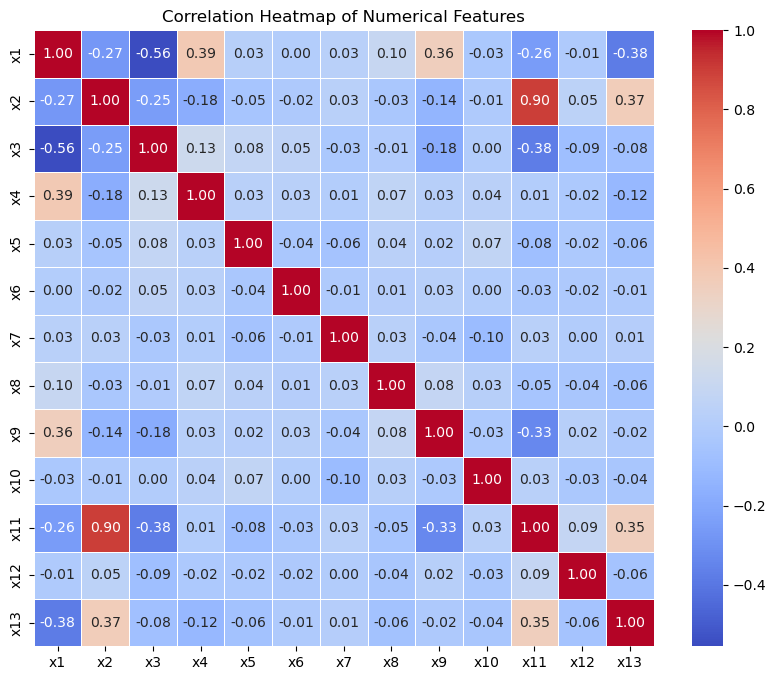

In [150]:
# Calculate the correlation matrix
corr_matrix = dataset[numeric_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**Takeaway**
- The diagonal elements represent the correlation of each variable with itself, which is always 1.0.

*Strong Negative Correlation:*
- Features "x1" and "x3" exhibit a strong negative correlation (-0.56). This implies that as the value of one feature increases, the value of the other feature tends to decrease significantly. Similarly, "x11" and "x3" also show a negative correlation (-0.38).

*Strong Positive Correlation:*
- Features "x2" and "x11" have a strong positive correlation (0.90), indicating that these two features tend to increase or decrease together. 

*Moderate Correlation:*
- Features "x1" and "x9" have a moderate positive correlation (0.36).

*Weak Correlation:*
- Features "x1" and "x12" have a weak correlation (-0.01). Similarly, "x7" and "x12" also exhibit a weak correlation (0.00).

# Feature Engineering
**As part of feature engineering we will do following preprocessing steps:**

- Drop duplicates: To ensure the integrity of our dataset, we check for and remove any duplicate rows. This helps prevent redundancy and potential biases in our analysis.
- Handle Missing Values (using imputation).
- Handle Feature Scalling
- Handle Categorical features(one hot encoding).


In [151]:
#dropping duplicates
dataset.drop_duplicates()

,ID,Gender,Location,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,Diagnosis
0,0,Male,Dublin,591.305146,-445.646021,-1792.511304,-43.554215,144.532731,31.930570,-326.565365,-27.181295,1491.214602,-16.075643,-1008.975591,1443.114521,1122.309632,1
1,1,NaN,London,1646.650850,-1231.555731,-544.183955,85.151732,-298.180013,91.094109,234.224992,-16.255377,3429.620922,-567.726922,-1894.958494,544.079461,2771.062100,2
2,2,Female,Belfast,17.937351,-594.165140,-647.680440,22.903837,NaN,15.474708,768.760910,-0.578832,82.072136,131.825799,86.705431,131.132690,1750.231751,0
3,3,Male,Belfast,985.648670,-903.923263,-775.103070,18.531142,52.600030,0.925980,624.792227,12.011113,NaN,-183.137698,-1333.005543,-266.900451,182.950280,2
4,4,Male,London,983.829283,-1431.588452,409.232842,40.739642,-258.700803,27.328327,-1005.938914,8.477903,1060.556109,263.230291,-1982.092159,976.272234,-585.290151,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,Male,Dublin,246.491406,-964.284256,195.200253,7.284156,-136.889137,40.887034,1115.550443,-17.971150,-1220.457787,-10.135607,-929.233352,-365.073004,899.153081,1
388,388,Female,Belfast,-334.186421,-499.685835,469.644098,0.241976,-233.665210,68.180395,657.413221,-22.572462,411.901457,-417.158173,-639.258796,721.674540,2327.250874,2
389,389,Female,Dublin,-326.269765,-459.056428,-318.092651,-14.070612,-544.624639,9.363828,422.215346,-3.924411,421.824932,52.693653,-348.455976,276.573000,2033.525357,0
390,390,Female,Dublin,-153.692921,323.636896,107.897240,-21.345488,30.801469,9.859655,-529.068511,9.619647,1702.197753,96.032303,-343.382201,-49.719952,426.256537,1


**Imputing missing values**

In [152]:
#filling missing values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
df = pd.DataFrame(dataset)


cat_imputer=SimpleImputer(strategy="most_frequent")
num_imputer= SimpleImputer(strategy="mean")

#define columns
cat_columns=["Gender","Location"]
num_columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13"]
# Extract ID and Diagnosis columns
id_cols = ["ID"]
target_cols = ["Diagnosis"]

#create an imputer
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_columns),("num_imputer", num_imputer, num_columns)])
# Fill missing values in x
filled_X = imputer.fit_transform(df)

# Concatenate processed features with ID and Diagnosis columns
processed_Data = pd.concat([pd.DataFrame(filled_X, columns=cat_columns + num_columns),df[target_cols]], axis=1)




When using the ColumnTransformer, it transforms the data and concatenates them, but the data types of the original DataFrame may not be preserved, so let's convert that back to their original data type.

In [153]:
# Convert numerical columns to numeric data type
processed_Data[num_columns] = processed_Data[num_columns].astype(float)

# Convert categorical columns to object data type
processed_Data[cat_columns] = processed_Data[cat_columns].astype(object)

processed_Data.dtypes

Gender        object
Location      object
x1           float64
x2           float64
x3           float64
x4           float64
x5           float64
x6           float64
x7           float64
x8           float64
x9           float64
x10          float64
x11          float64
x12          float64
x13          float64
Diagnosis      int64
dtype: object

In [154]:
processed_Data.isnull().sum()

Gender       0
Location     0
x1           0
x2           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x9           0
x10          0
x11          0
x12          0
x13          0
Diagnosis    0
dtype: int64

All the null values have been filled.

**One-Hot Encoding**

It is a technique used to convert categorical data into a numerical format. It works by representing each category as a binary vector where only one bit is 'hot' (set to 1) while all others are 'cold' (set to 0). This transformation allows machine learning algorithms to operate on categorical data effectively by representing them as numerical features.

In [155]:
#Initialization of OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

#Fit and transform the categorical columns
encoded_cols = encoder.fit_transform(processed_Data[cat_columns])

#unique categories for each categorical column
categories = encoder.categories_

# Create new column names based on unique categories
new_columns = []
for i, col in enumerate(cat_columns):
    new_columns.extend([f"{col}_{category}" for category in categories[i]])

# Convert to dataframe with appropriate column names
encoded_df = pd.DataFrame(encoded_cols, columns=new_columns)

# Drop the original categorical columns from processed_Data
processed_Data.drop(columns=cat_columns, inplace=True)

# Concatenate encoded columns with the original DataFrame
processed_Data = pd.concat([processed_Data, encoded_df], axis=1)

# Display the encoded DataFrame
print(processed_Data)

              x1           x2           x3         x4          x5         x6  \
0     591.305146  -445.646021 -1792.511304 -43.554215  144.532731  31.930570   
1    1646.650850 -1231.555731  -544.183955  85.151732 -298.180013  91.094109   
2      17.937351  -594.165140  -647.680440  22.903837  -30.617114  15.474708   
3     985.648670  -903.923263  -775.103070  18.531142   52.600030   0.925980   
4     983.829283 -1431.588452   409.232842  40.739642 -258.700803  27.328327   
..           ...          ...          ...        ...         ...        ...   
387   246.491406  -964.284256   195.200253   7.284156 -136.889137  40.887034   
388  -334.186421  -499.685835   469.644098   0.241976 -233.665210  68.180395   
389  -326.269765  -459.056428  -318.092651 -14.070612 -544.624639   9.363828   
390  -153.692921   323.636896   107.897240 -21.345488   30.801469   9.859655   
391   871.409545  -149.549456 -1037.170913  39.216723  -80.885692  19.656361   

              x7         x8           x

In [156]:
# data types after one hot encoding
processed_Data.shape

(392, 19)

**Correlation matrix of different features with the target variable**

In [157]:
import pandas as pd
# Calculate the correlation matrix
correlation_matrix = processed_Data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                        x1        x2        x3        x4        x5        x6  \
x1                1.000000 -0.272601 -0.555149  0.390821  0.025464  0.003937   
x2               -0.272601  1.000000 -0.249733 -0.177364 -0.049854 -0.018284   
x3               -0.555149 -0.249733  1.000000  0.130094  0.080514  0.054099   
x4                0.390821 -0.177364  0.130094  1.000000  0.030933  0.033658   
x5                0.025464 -0.049854  0.080514  0.030933  1.000000 -0.038492   
x6                0.003937 -0.018284  0.054099  0.033658 -0.038492  1.000000   
x7                0.028451  0.030843 -0.029289  0.006135 -0.057006 -0.008703   
x8                0.095400 -0.033595 -0.007420  0.068786  0.035894  0.013232   
x9                0.354532 -0.140883 -0.179460  0.025788  0.018953  0.026934   
x10              -0.030285 -0.010606  0.002668  0.036457  0.072161  0.004131   
x11              -0.255540  0.895255 -0.376348  0.005674 -0.083509 -0.033617   
x12              -0.

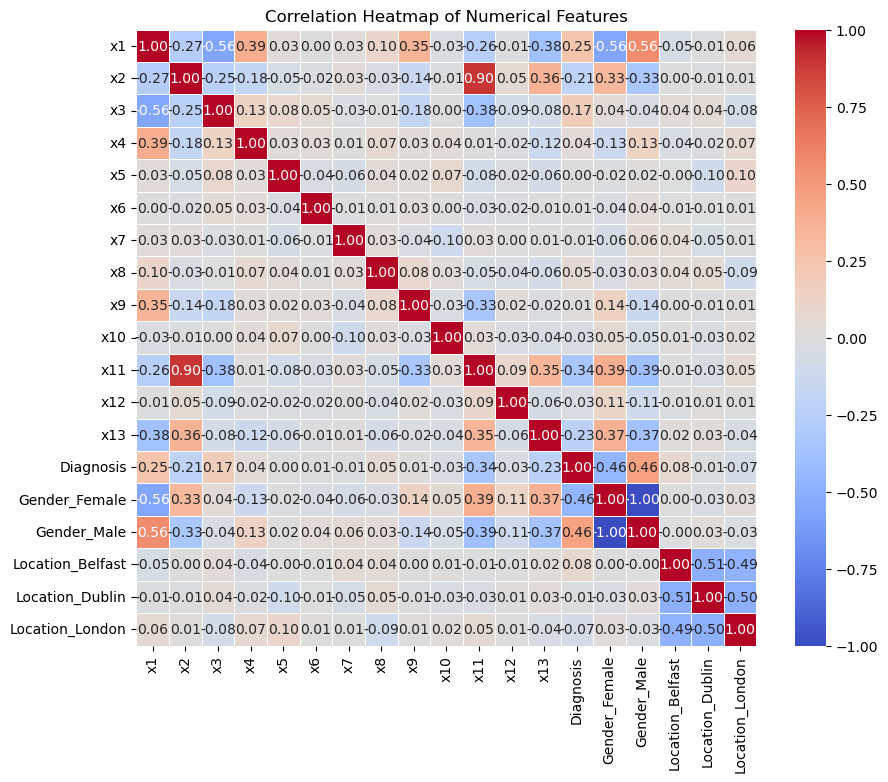

In [158]:
# Visualise the matrix using a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Takeaway**

*Strong Positive Correlation:*

- Feature "x1" has a moderate positive correlation with the target variable (0.251468).
- Gender_Male has a strong positive correlation with the target variable (0.456218).
- Location_Belfast has a positive correlation with the target variable (0.077421).

*Strong Negative Correlation:*

- Gender_Female has a strong negative correlation with the target variable (-0.456218).
- Feature "x3" has a moderate negative correlation with the target variable (-0.172294).
- Location_London has a negative correlation with the target variable (-0.068850).

*Moderate Correlation:*

- Features "x2" and "x11" have moderate negative correlations with the target variable (-0.207975 and -0.340571, respectively).
- Feature "x9" has a weak positive correlation with the target variable (0.010193).
- Location_Dublin has a weak negative correlation with the target variable (-0.008611).

*Weak Correlation:*

- Other features such as "x4", "x5", "x6", "x7", "x8", "x10", "x12", and "x13" have weak correlations with the target variable (close to 0).



**Key- points**
- "Gender_Female" has a strong negative correlation, indicating that females might be associated with a certain diagnosis, while "Gender_Male" has a strong positive correlation, suggesting a different diagnosis pattern for males.
- "Belfast" has a positive correlation, while "London" has a negative correlation, suggesting potential geographic variations in diagnosis patterns.
- Among numerical features, "x1", "x2", "x3", and "x11" exhibit moderate to strong correlations with the target variable. These features might have higher importance in predicting the diagnosis compared to others.


**Feature Scaling**
This step is not necessary for random forest however since KNN relies on the distance between data points, it's essential to scale all numerical features I have done this after splitting the data into training and test sets.

# Model Training & Performance Evaluation



1.**Random Forest**

In [159]:
#train and test data
# Split the dataset into features (X) and target variable (y)
X = processed_Data.drop(columns=['Diagnosis'])
y = processed_Data['Diagnosis']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [160]:
#error handling 
# Check for any remaining missing values in the dataset
if X_train.isnull().values.any() or X_test.isnull().values.any():
    print("Warning: There are still missing values in the dataset.")
    # Handle missing values accordingly, such as by using a different imputation strategy or removing rows with missing values


In [161]:
#Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=0)

#10-fold cross-validation on the training set
crossval = cross_val_score(rf_classifier, X_train, y_train, cv=10)

print("Cross-Validation Scores:", crossval)
print("Average Cross Validation Score:", crossval.mean())


#Train the classifier on the training set
rf_classifier.fit(X_train, y_train)


#evaluating the classifier on a separate test set
test_accuracy = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions on the testing data
rf_pred = rf_classifier.predict(X_test)


Cross-Validation Scores: [0.71875    0.78125    0.8125     0.74193548 0.77419355 0.64516129
 0.74193548 0.77419355 0.74193548 0.83870968]
Average Cross Validation Score: 0.7570564516129032
Test Accuracy: 0.7721518987341772


In [162]:
#to ensure that the algorithm is working 
rf_classifier.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

**Random Forest Evaluation Metrics**

In [163]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='weighted')  # Choose appropriate averaging strategy
recall = recall_score(y_test, rf_pred, average='weighted')  # Choose appropriate averaging strategy
f1 = f1_score(y_test, rf_pred, average='weighted')  # Choose appropriate averaging strategy
conf_matrix = confusion_matrix(y_test, rf_pred)
class_report = classification_report(y_test, rf_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.77
Precision: 0.78
Recall: 0.77
F1 Score: 0.77
Confusion Matrix:
 [[12  1  3]
 [ 4 20  5]
 [ 3  2 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.75      0.69        16
           1       0.87      0.69      0.77        29
           2       0.78      0.85      0.82        34

    accuracy                           0.77        79
   macro avg       0.76      0.76      0.76        79
weighted avg       0.78      0.77      0.77        79



1. ACCURACY: According to the analysis of the dataset done before applying the model , it appears to be balanced. For such datasets accuracy  accuracy provides a straightforward assessment of the overall correctness of the classifier's predictions. A high accuracy indicates that the classifier is making correct predictions for all the classes involved. In this case, it's 0.77 or 77%, indicating that the model correctly predicts the class of 77% of the instances.

2. PRECISION: it helps assess the reliability of positive predictions made by the classifier. In this case of a balanced dataset, precision provides insights into the classifier's ability to avoid misclassifying instances of one class as another which is low for this dataset. 

- For class 0, the random forest classifier correctly predicted 63% of the instances as class 0, but incorrectly classified 37% of instances as class 0 when they were not (false positives).
- For class 1, the classifier correctly predicted 87% of the instances as class 1, but incorrectly classified 13% of instances as class 1 when they were not (false positives).
- For class 2, the classifier correctly predicted 78% of the instances as class 2, but incorrectly classified 22% of instances as class 2 when they were not (false positives).

3. RECALL: It measures the ability of the classifier to capture most of the positive instances in the dataset. A high recall indicates that the classifier can identify most of the positive instances, which is true for this case. 

- Recall for class 0 (0.75): The RF classifier correctly identified 75% of instances that truly belong to class 0 as class 0. However, 25% of class 0 instances were incorrectly classified as other classes or false negatives.
- Recall for class 1 (0.69): The RF classifier correctly identified 69% of instances that truly belong to class 1 as class 1. However, 31% of class 1 instances were incorrectly classified as other classes or false negatives.
- Recall for class 2 (0.85): The RF classifier correctly identified 85% of instances that truly belong to class 2 as class 2. However, 15% of class 2 instances were incorrectly classified as other classes or false negatives.


**Takeaway**

Accuracy alone cannot provide a picture of the Algorithms performance, in cases of imbalanced datasets precision and recall provide valuable insights. For example, in fraud detection, the number of fraudulent transactions may be much lower than the number of legitimate transactions, here accuracy alone can be misleading because an algorithm that always predicts the majority class would achieve high accuracy.

Other metrics like Recall and precision help identify potential biases, trade-offs between false positives and false negatives, and the overall effectiveness of the classifier in correctly identifying instances. Therefore, paying attention to precision and recall alongside accuracy is essential for a comprehensive evaluation of a classification model.

**Confusion Matrix**

It is a matrix that summarizes the performance of an algorithm. It shows the number of true positives, true negatives, false positives, and false negatives. The rows represent the actual classes, and the columns represent the predicted classes.
- In the first row, there are 12 instances that belong to class 0 (true positives), 1 instance that belong to class 1 but are incorrectly predicted as class 0 (false negatives), and 3 instances that belong to class 2 but are incorrectly predicted as class 0 (false negatives).
- In the second row, there are 4 instances that belong to class 0 but are incorrectly predicted as class 1 (false negatives), 20 instances that truly belong to class 1 (true positives), and 5 instances that belong to class 2 but are incorrectly predicted as class 1 (false negatives).
- In the third row, there are 3 instances that belong to class 0 but are incorrectly predicted as class 2 (false negatives), 2 instances that belong to class 1 but are incorrectly predicted as class 2 (false negatives), and 29 instances that truly belong to class 2 (true positives).

The confusin matrix has been visualised using a heatmap below:

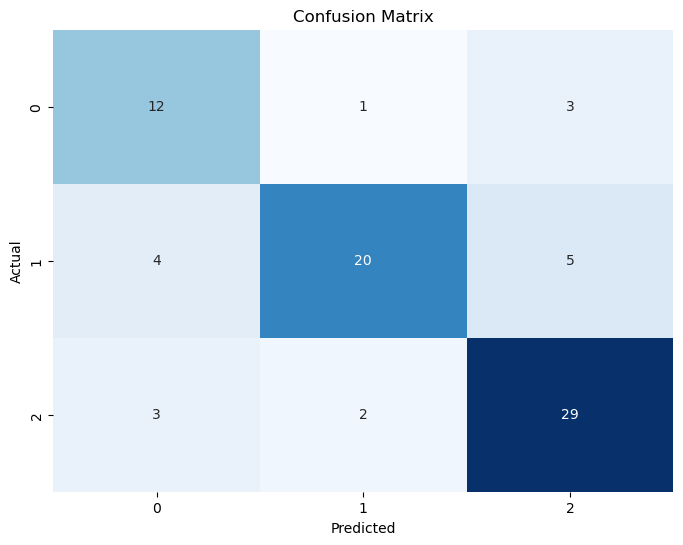

In [164]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Ranking Features**

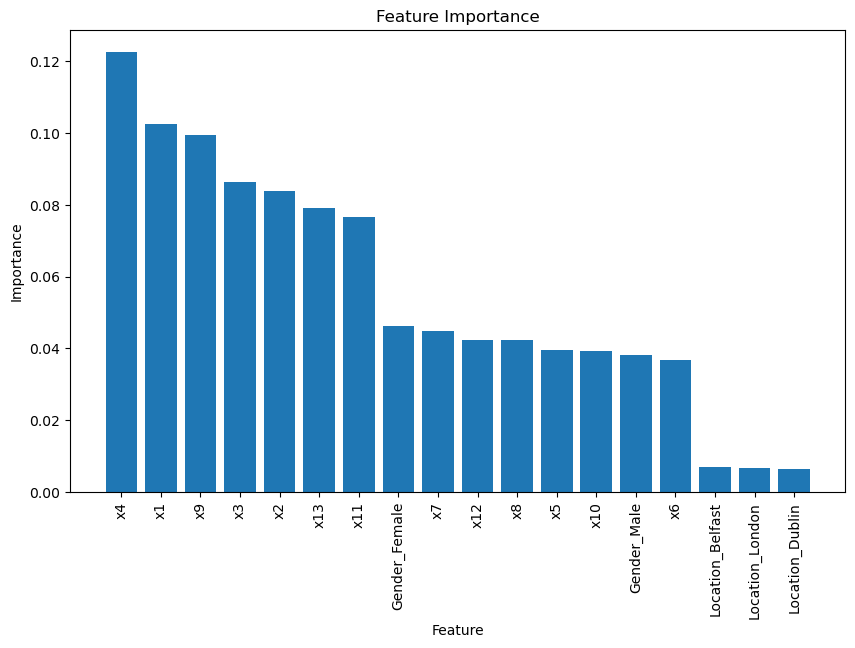

In [165]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

**Recursive Feature Elimination**

In [166]:
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

# Initialize RFE
rfe = RFE(estimator=rf_classifier, n_features_to_select=5, step=1)
# Fit RFE
rfe.fit(X_train, y_train)

# Apply RFE transformation to the training and testing data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train RF classifier on the transformed data
rf_classifier.fit(X_train_rfe, y_train)


# Evaluate performance
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69        16
           1       0.87      0.69      0.77        29
           2       0.78      0.85      0.82        34

    accuracy                           0.77        79
   macro avg       0.76      0.76      0.76        79
weighted avg       0.78      0.77      0.77        79



**Key Take-away**

- The accuracy of the model is 0.77, which means that it correctly predicts the class label for approximately 77% of the instances in the dataset
- A high F1-score indicates that the model has a good balance between precision and recall for each class.


In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report



# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV on the transformed training data
grid_search.fit(X_train_rfe, y_train)

# Get the best parameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

print("Random Forest - Best Parameters:", best_params)


Random Forest - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


**Take-away**

- Max Depth: The trees in the Random Forest are allowed to grow as deep as needed to classify the data accurately.
- Min Samples Leaf: Each final "leaf" of the tree must contain at least one data point.
- Min Samples Split: Before a node in the tree is split further, it must contain at least two data points, preventing overly complex trees.
- Number of Estimators: The Random Forest consists of 300 individual decision trees, which work together to make predictions. 

[Text(0.48026315789473684, 0.9583333333333334, 'X[2] <= -6.532\ngini = 0.665\nsamples = 195\nvalue = [109, 111, 93]'),
 Text(0.24342105263157895, 0.875, 'X[0] <= 482.172\ngini = 0.536\nsamples = 50\nvalue = [11, 51, 20]'),
 Text(0.18859649122807018, 0.7916666666666666, 'X[1] <= 659.576\ngini = 0.48\nsamples = 44\nvalue = [10, 50, 13]'),
 Text(0.13157894736842105, 0.7083333333333334, 'X[4] <= -128.596\ngini = 0.291\nsamples = 34\nvalue = [8, 49, 2]'),
 Text(0.07017543859649122, 0.625, 'X[1] <= -657.313\ngini = 0.593\nsamples = 5\nvalue = [5, 2, 2]'),
 Text(0.03508771929824561, 0.5416666666666666, 'X[2] <= -11.524\ngini = 0.444\nsamples = 2\nvalue = [0, 1, 2]'),
 Text(0.017543859649122806, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2]'),
 Text(0.05263157894736842, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.10526315789473684, 0.5416666666666666, 'X[3] <= -636.941\ngini = 0.278\nsamples = 3\nvalue = [5, 1, 0]'),
 Text(0.08771929824561403, 0

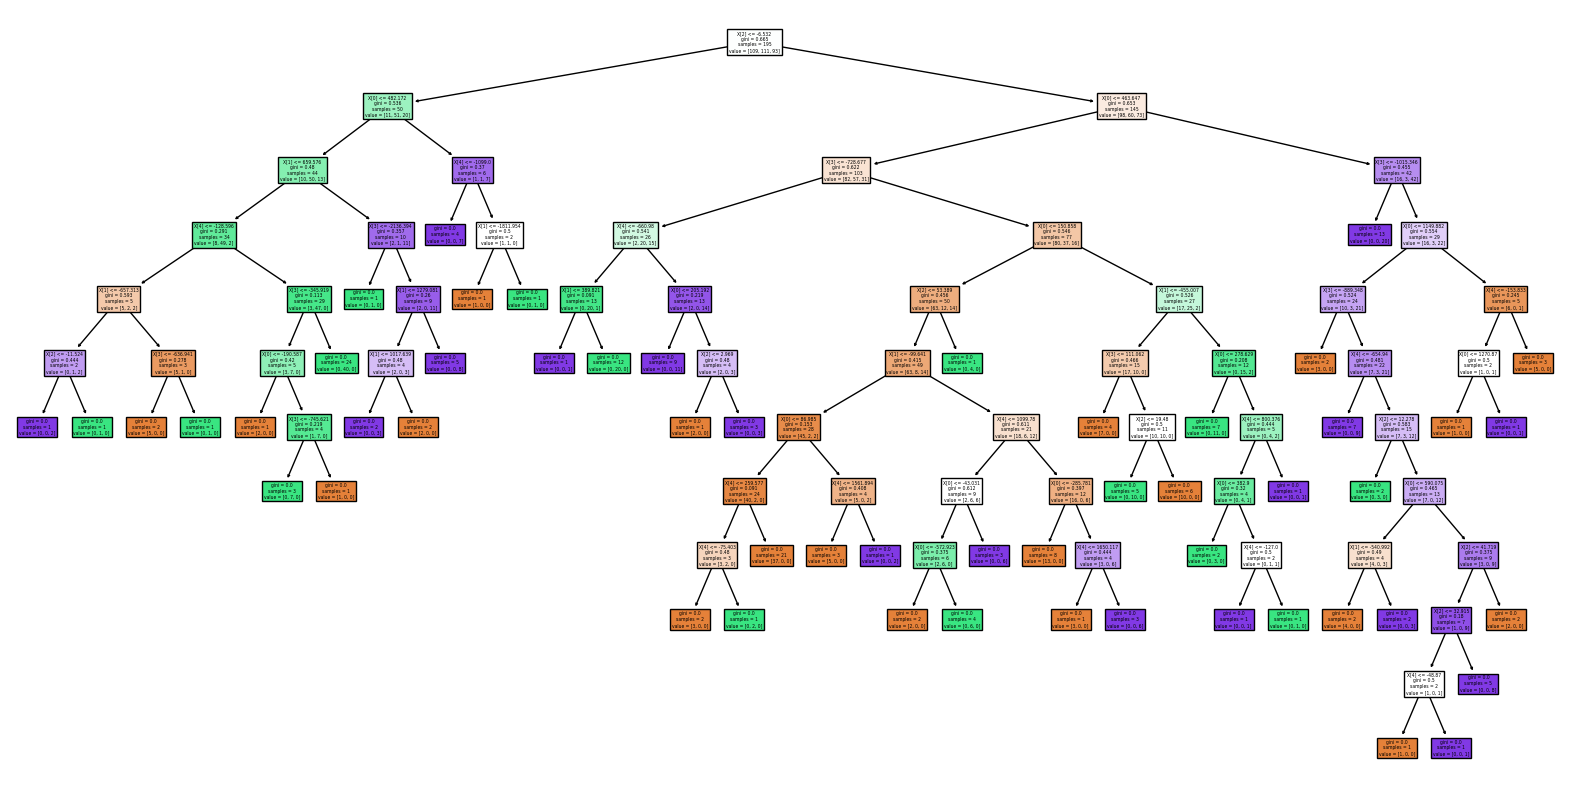

In [168]:
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize one of the decision trees (in this case the first tree at the 0th index)
plt.figure(figsize=(20, 10))
tree.plot_tree(rf_classifier.estimators_[0],filled=True)

# KNN

In [169]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# Identify the relevant features based on the training data
select = SelectKBest(mutual_info_regression, k=5).fit(X_train, y_train)
# Now transform the training and test inputs
X_train = select.transform(X_train)
X_test = select.transform(X_test)
X_test

array([[ 0.8348683 , -0.87903505,  0.42736126,  0.9968102 , -0.9968102 ],
       [-0.36472284,  0.40668901,  1.21055651, -1.00320001,  1.00320001],
       [ 0.85951664, -1.39975825, -1.20300347, -1.00320001,  1.00320001],
       [-0.11289331,  0.43315008, -0.24515353, -1.00320001,  1.00320001],
       [ 0.18187398,  0.42540196, -0.82881243, -1.00320001,  1.00320001],
       [-0.73565078,  2.3862092 , -1.31131124,  0.9968102 , -0.9968102 ],
       [ 1.18326757, -0.8212797 , -1.10438679, -1.00320001,  1.00320001],
       [ 0.13244342,  0.98610834, -0.25505581, -1.00320001,  1.00320001],
       [ 0.8934667 ,  0.37510393, -1.19390795, -1.00320001,  1.00320001],
       [ 0.74534335,  0.6556098 , -0.73856039, -1.00320001,  1.00320001],
       [-0.86416351, -0.25318857,  1.01900936,  0.9968102 , -0.9968102 ],
       [-0.36351847, -1.49565973,  0.15578355, -1.00320001,  1.00320001],
       [ 0.53139247,  1.29375885, -1.71738387, -1.00320001,  1.00320001],
       [-1.2997319 ,  0.56392156,  0.0

In [170]:
from sklearn.neighbors import KNeighborsClassifier
#Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

#10-fold cross-validation on the training set
cross_val = cross_val_score(knn_classifier, X_train, y_train, cv=10)

print("Cross-Validation Scores:", crossval)
print("Average Cross Validation Score:", crossval.mean())


#Train the model
knn_classifier.fit(X_train, y_train)


#evaluating the classifier on a separate test set
test_accuracy = knn_classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions on the testing data
knn_pred = knn_classifier.predict(X_test)

Cross-Validation Scores: [0.71875    0.78125    0.8125     0.74193548 0.77419355 0.64516129
 0.74193548 0.77419355 0.74193548 0.83870968]
Average Cross Validation Score: 0.7570564516129032
Test Accuracy: 0.5063291139240507


C:\Users\eisha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\eisha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

**Take - away**

The main takeaway from the cross-validation scores is that the model's performance varies across different subsets of the data, with scores ranging from 0.645 to 0.839. However, the average cross-validation score indicates that, on average, the model performs reasonably well, with an accuracy of approximately 75.7%. Despite this, the test accuracy, which measures the model's performance on unseen data, is notably lower at around 50.6%. This suggests that while the model performs adequately on average, it may struggle to generalize to new data, highlighting the importance of evaluating performance on an independent test set.

In [171]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred, average='weighted')  # Choose appropriate averaging strategy
recall = recall_score(y_test, knn_pred, average='weighted')  # Choose appropriate averaging strategy
f1 = f1_score(y_test, knn_pred, average='weighted')  # Choose appropriate averaging strategy
conf_matrix = confusion_matrix(y_test, knn_pred)
class_report = classification_report(y_test, knn_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.51
Precision: 0.52
Recall: 0.51
F1 Score: 0.50
Confusion Matrix:
 [[ 8  6  2]
 [10  9 10]
 [ 7  4 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.50      0.39        16
           1       0.47      0.31      0.38        29
           2       0.66      0.68      0.67        34

    accuracy                           0.51        79
   macro avg       0.48      0.50      0.48        79
weighted avg       0.52      0.51      0.50        79



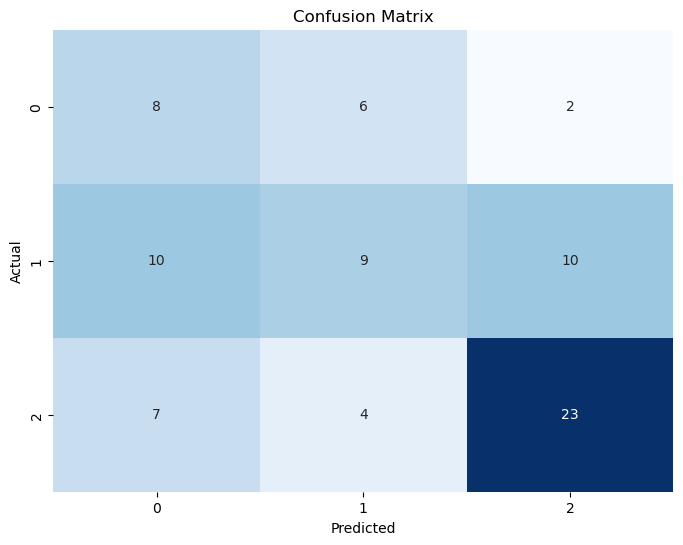

In [172]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**RFE**

In [173]:
# Initialize RFE for KNN
rfe = RFE(estimator=knn_classifier, n_features_to_select=5, step=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Apply RFE transformation to the training and testing data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train KNN classifier on the transformed data
knn_classifier.fit(X_train_rfe, y_train)


# Evaluate performance
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.31      0.50      0.38        16
           1       0.33      0.21      0.26        29
           2       0.57      0.59      0.58        34

    accuracy                           0.43        79
   macro avg       0.40      0.43      0.41        79
weighted avg       0.43      0.43      0.42        79



**Hyperparameter tuning using Grid search**

In [174]:
print("X_train_rfe shape:", X_train_rfe.shape)
print("y_train shape:", y_train.shape)

X_train_rfe shape: (313, 5)
y_train shape: (313,)


In [175]:

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV on the transformed training data
grid_search.fit(X_train_rfe, y_train)

# Get the best parameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_knn_classifier = grid_search.best_estimator_

# Predict on the testing data using the best estimator
y_pred_knn = best_knn_classifier.predict(X_test_rfe)


# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)



Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


C:\Users\eisha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [176]:
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='weighted')  # Choose appropriate averaging strategy
recall = recall_score(y_test, rf_pred, average='weighted')  # Choose appropriate averaging strategy
f1 = f1_score(y_test, rf_pred, average='weighted')  # Choose appropriate averaging strategy
conf_matrix = confusion_matrix(y_test, rf_pred)
class_report = classification_report(y_test, rf_pred)

# Evaluating knn's performance
accuracy1 = accuracy_score(y_test, knn_pred)
precision1 = precision_score(y_test, knn_pred, average='weighted')  # Choose appropriate averaging strategy
recall1 = recall_score(y_test, knn_pred, average='weighted')  # Choose appropriate averaging strategy
f1_knn = f1_score(y_test, knn_pred, average='weighted')  # Choose appropriate averaging strategy
conf_matrix1 = confusion_matrix(y_test, knn_pred)
class_report1 = classification_report(y_test, knn_pred)


print(f"Accuracy of Random Forest: {accuracy:.2f}")
print(f"Accuracy of KNN: {accuracy1:.2f}")
print(f"Precision Of Random Forest: {precision:.2f}")
print(f"Precision Of KNN: {precision1:.2f}")
print(f"Recall score of Random Forest: {recall:.2f}")
print(f"Recall score of KNN: {recall1:.2f}")
print(f"F1 Score of Random Forest: {f1:.2f}")
print(f"F1 Score of KNN: {f1_knn:.2f}")
print("Confusion Matrix of Random Forest:\n", conf_matrix)
print("Confusion Matrix of KNN:\n", conf_matrix1)
print("Classification Report OF Random Forest:\n", class_report)
print("Classification Report OF KNN:\n", class_report1)

Accuracy of Random Forest: 0.77
Accuracy of KNN: 0.51
Precision Of Random Forest: 0.78
Precision Of KNN: 0.52
Recall score of Random Forest: 0.77
Recall score of KNN: 0.51
F1 Score of Random Forest: 0.77
F1 Score of KNN: 0.50
Confusion Matrix of Random Forest:
 [[12  1  3]
 [ 4 20  5]
 [ 3  2 29]]
Confusion Matrix of KNN:
 [[ 8  6  2]
 [10  9 10]
 [ 7  4 23]]
Classification Report OF Random Forest:
               precision    recall  f1-score   support

           0       0.63      0.75      0.69        16
           1       0.87      0.69      0.77        29
           2       0.78      0.85      0.82        34

    accuracy                           0.77        79
   macro avg       0.76      0.76      0.76        79
weighted avg       0.78      0.77      0.77        79

Classification Report OF KNN:
               precision    recall  f1-score   support

           0       0.32      0.50      0.39        16
           1       0.47      0.31      0.38        29
           2       0.6

# Evaluation

**Key take-away**

- Random Forest outperforms KNN in terms of accuracy, achieving a higher accuracy score of 0.77 compared to KNN's accuracy of 0.51.
- Random Forest also exhibits higher precision compared to KNN, with a precision score of 0.78 compared to KNN's precision of 0.52.
- The recall score for Random Forest (0.77) is higher than that of KNN (0.51), indicating that Random Forest is better at correctly identifying true positives.
- Random Forest achieves a higher F1 score (0.77) compared to KNN (0.50), indicating better overall performance in terms of precision and recall.
- The confusion matrix for Random Forest shows higher values along the diagonal, indicating better classification performance compared to KNN.
- Random Forest's classification report shows higher precision, recall, and F1-score values across all classes compared to KNN.


Overall, based on these performance metrics, Random Forest demonstrates superior performance compared to KNN in terms of accuracy, precision, recall score, and F1-score.